<a href="https://colab.research.google.com/github/laurasg03/Parcial_2_SyS/blob/main/Parcial_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 1

wo= 1.0
Fo= 1.5707963267948966


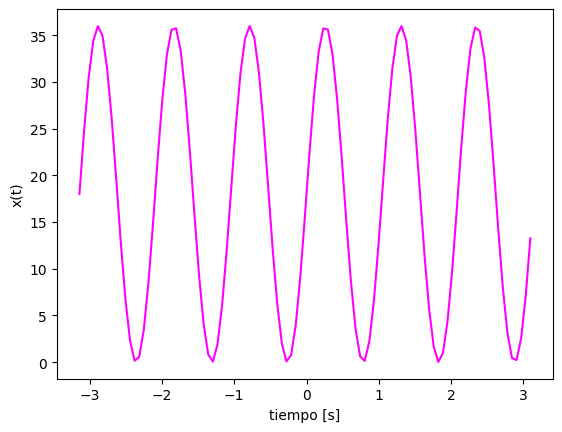

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(6*np.sin(3*tv+1/4*np.pi))**2 #señal de entrada
plt.plot(tv,x, 'magenta') #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

In [2]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [3]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),'mediumvioletred',label="Re{Φn(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("Φn(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),'teal',label="Im{Φn(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [4]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = +9j #armónico +9j
cn[N+6] = -9j #armónico -9j

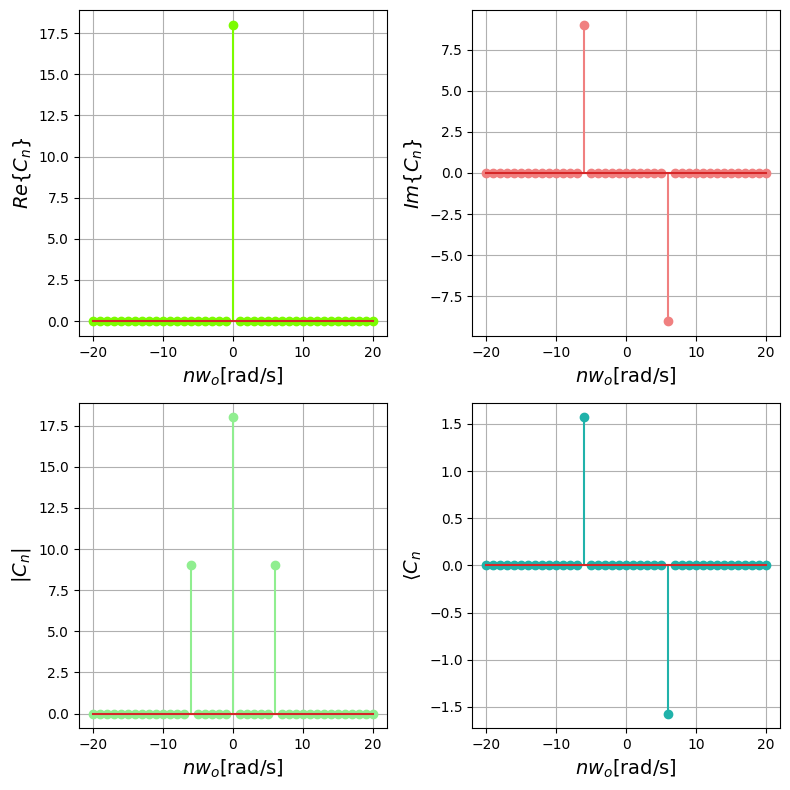

In [5]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'lawngreen')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'lightcoral')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'lightgreen')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'lightseagreen')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Se calcula el error relativo

In [6]:
#graficar reconstrucción

Px = 486 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='black',label='Xc(t)') # señal estimada o filtrada
    plt.plot(tv,x,color='purple',label='X(t)') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

Punto 2

In [7]:
# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz #se utiliza para instalar desde el repositorio de github y "yt_dpl" se utiliza para descargar contenido de sitios de streaming en línea como YouTube.

In [ ]:
link="https://www.youtube.com/watch?v=z2pt4CN4rhc" #link de yotube de la canción
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}  #se utiliza para extraer el audio del video del link de youtube

In [ ]:
!ffmpeg -y -i audio.mp3 output.wav  #para pasar el archivo de formato mp3 a .wav

In [ ]:
!pip install soundfile #instala soundfile en el entorno de python, para manipular audios más fácil

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

In [13]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [14]:
from IPython.display import Audio #librería para reproducir audio

#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

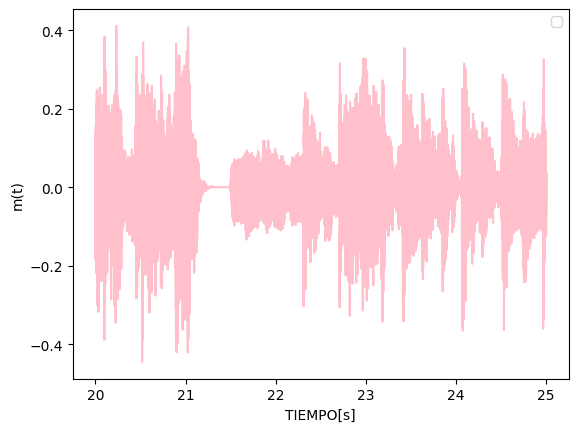

In [15]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m,'pink') #graficar señal mensaje en el tiempo
plt.xlabel('TIEMPO[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()


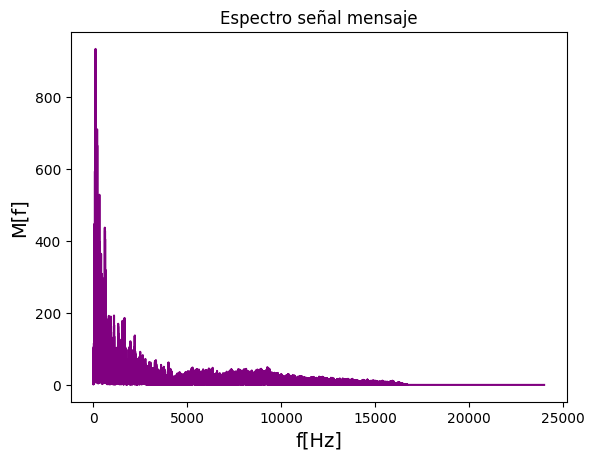

In [16]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw), 'purple')#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'M[f]',fontsize = 14)
plt.show()


In [17]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

In [18]:
#repoducir portadora
Audio(c,rate=fs)

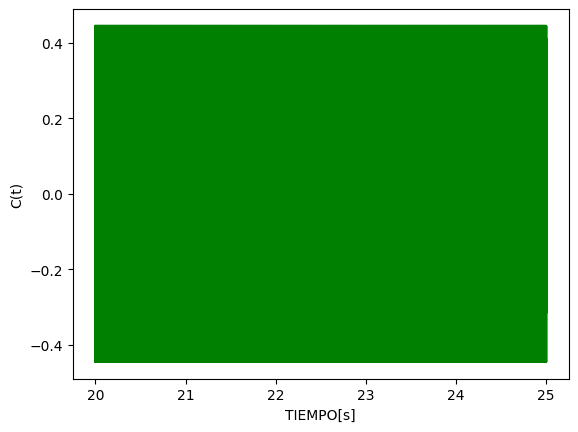

In [19]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c,  'green') #graficar señal mensaje en el tiempo
plt.xlabel('TIEMPO[s]')
plt.ylabel('C(t)')
plt.show()

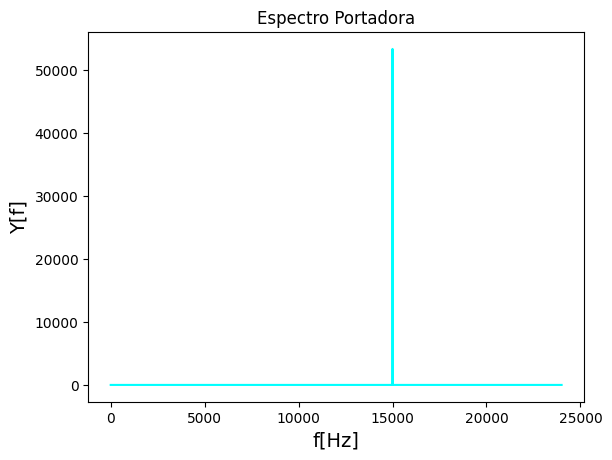

In [20]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw), 'aqua')#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'Y[f]',fontsize = 14)
plt.show()


In [21]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM


In [22]:
#repoducir modulada
Audio(y,rate=fs)

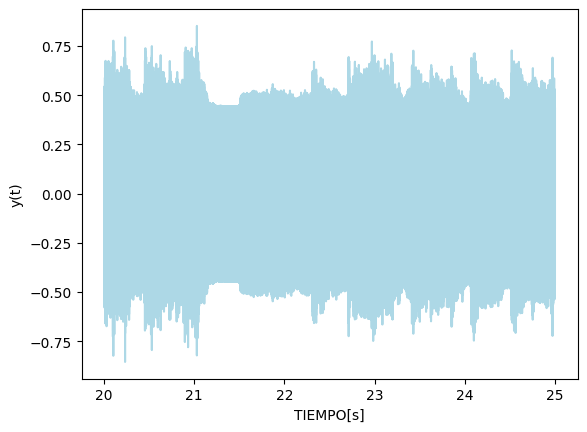

In [23]:
plt.plot(tt,y, 'lightblue') #graficar señal mensaje en el tiempo
plt.xlabel('TIEMPO[s]')
plt.ylabel('y(t)')
plt.show()

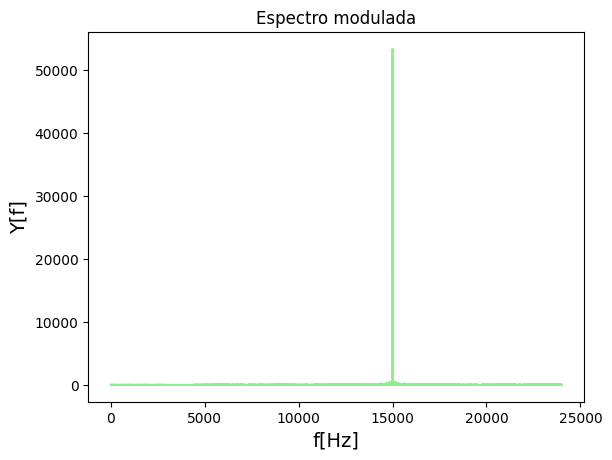

In [24]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw), 'lightgreen')#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'Y[f]',fontsize = 14)
plt.show()

Punto 3

In [ ]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

In [26]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [ ]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

In [ ]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

In [ ]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, _ = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

In [ ]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

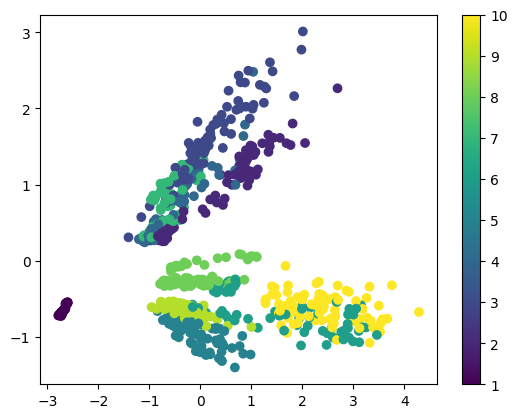

In [31]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

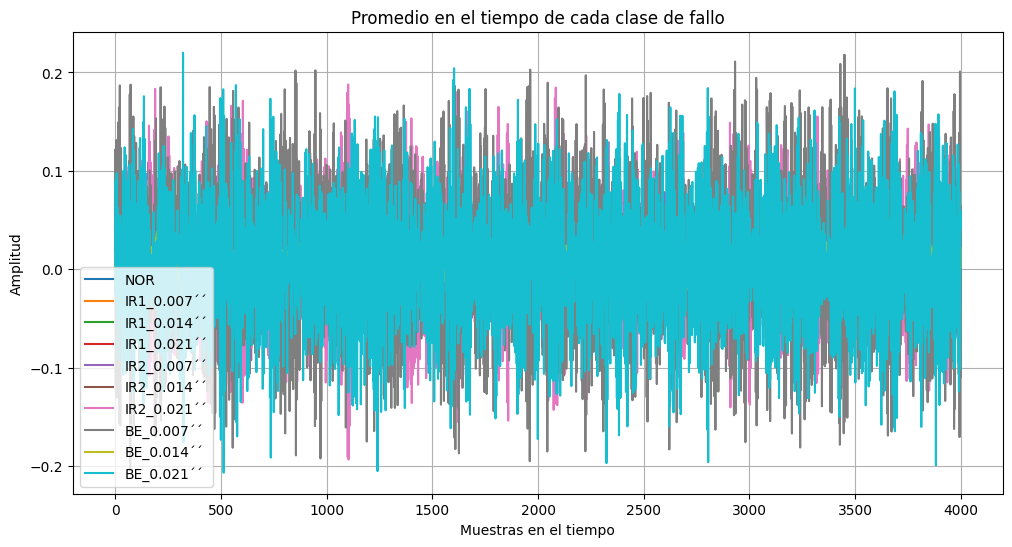

In [32]:
import numpy as np

# Crear una lista para almacenar los promedios de cada clase
promedios_tiempo = []

# Calcular el promedio en el tiempo para cada clase
for clase in np.unique(Ytrue):
    promedio_clase = np.mean(Xtrain[Ytrain == clase], axis=0)
    promedios_tiempo.append(promedio_clase)

# Graficar el promedio en el tiempo de cada clase
plt.figure(figsize=(12, 6))
for i, promedio_clase in enumerate(promedios_tiempo):
    plt.plot(promedio_clase, label=labels_[i])

plt.title("Promedio en el tiempo de cada clase de fallo")
plt.xlabel("Muestras en el tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

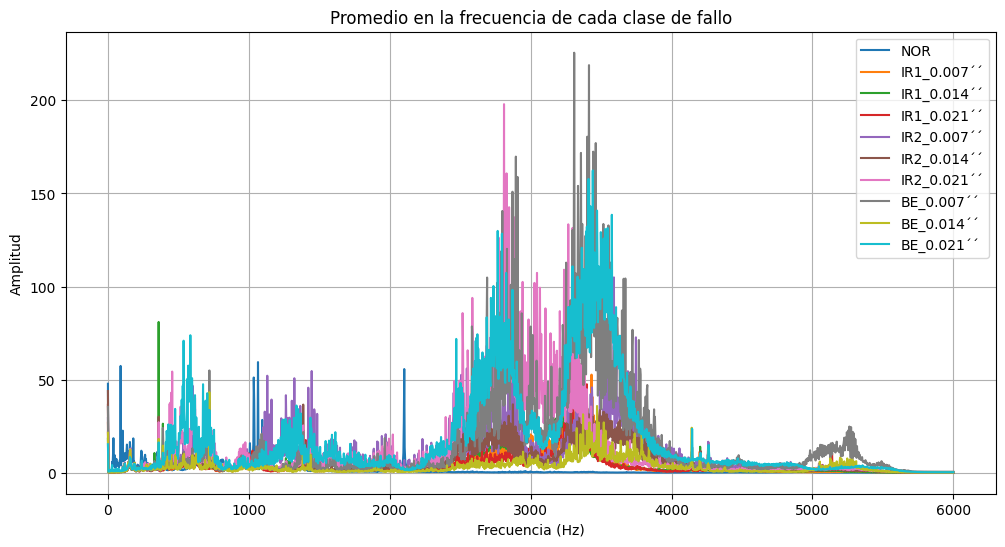

In [33]:
# Calcular el promedio en la frecuencia para cada clase
promedios_frecuencia = []

for clase in np.unique(Ytrain):
    espectros = Xw[Ytrain == clase]
    promedio_espectro = np.mean(espectros, axis=0)
    promedios_frecuencia.append(promedio_espectro)

# Graficar el promedio en la frecuencia de cada clase
plt.figure(figsize=(12, 6))
for i, promedio_espectro in enumerate(promedios_frecuencia):
    plt.plot(vf, promedio_espectro, label=labels_[i])

plt.title("Promedio en la frecuencia de cada clase de fallo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
vftest = np.fft.rfftfreq(Xtest.shape[1],1/Fs) #freq vector
Xwtest = (abs(np.fft.rfft(Xtest))) # FFT
Xwtest.shape

(360, 2001)

In [35]:
#normalización del conjunto de datos del espectro de Fourier Xtrain
mediatrain=np.mean(Xw) #Calculo de la media del conjunto de datos
desviaciontrain=np.std(Xw) #Calculo la desviación estándar del conjunto de datos
Xwnormal = (Xw-mediatrain)/desviaciontrain #Normalizar los datos utilizando el método de puntuación estándar
Xwnormal


array([[ 2.69057969, -0.37082132, -0.3814965 , ..., -0.38590252,
        -0.3859245 , -0.38603695],
       [ 0.63584565, -0.34672112, -0.35331688, ..., -0.38216907,
        -0.38213472, -0.38174838],
       [ 0.61512034, -0.3768674 , -0.38286834, ..., -0.38551701,
        -0.38610243, -0.38551737],
       ...,
       [ 3.32314717, -0.37650617, -0.37762407, ..., -0.38474439,
        -0.38470234, -0.38398751],
       [ 0.64351559, -0.35468437, -0.35851199, ..., -0.38266527,
        -0.3827028 , -0.38252362],
       [ 0.21215191, -0.38226326, -0.3823727 , ..., -0.38968825,
        -0.38953987, -0.38988016]])

In [36]:
#normalización del conjunto de datos del espectro de Fourier de las pruebas
mediatest=np.mean(Xwtest)
desviaciontest1=np.std(Xwtest)
Xwnormal1 = (Xwtest-mediatest)/desviaciontest1
Xwnormal1

array([[ 2.67678741, -0.31498722, -0.31850878, ..., -0.38805888,
        -0.38840331, -0.3881229 ],
       [ 0.33815099, -0.3561588 , -0.35008418, ..., -0.37599042,
        -0.37588364, -0.37632489],
       [ 0.52604083, -0.37622764, -0.37658636, ..., -0.37328429,
        -0.37325598, -0.37291525],
       ...,
       [ 0.77777665, -0.36639064, -0.36631796, ..., -0.38128373,
        -0.38111199, -0.38113185],
       [ 0.13484134, -0.35992077, -0.36551197, ..., -0.38726542,
        -0.38728672, -0.3873156 ],
       [ 0.3905088 , -0.3660539 , -0.36202489, ..., -0.30532807,
        -0.30504107, -0.30568473]])

In [37]:
# calcular distancias entre puntos en dos conjuntos de datos ya normalizados
from scipy.spatial.distance import cdist #calcula distancias entre puntos en dos conjuntos de datos.
vector_labls= [] #Se crea una lista vacía
for i in range(len(Xtest)):
  p=cdist(Xwtest,Xw)
  vector_labls.append(Ytrain[np.argmin(p[i,])]) #devuelve el índice del punto más cercano en Xw al punto Xtest[i] en Xwtest

vector_labls #que contiene las etiquetas predichas para los puntos en el conjunto de datos de prueba Xtest

[1,
 7,
 5,
 9,
 2,
 5,
 6,
 1,
 9,
 10,
 3,
 6,
 3,
 3,
 6,
 8,
 6,
 9,
 8,
 5,
 10,
 8,
 4,
 3,
 7,
 10,
 6,
 7,
 1,
 6,
 2,
 10,
 1,
 3,
 5,
 4,
 6,
 1,
 5,
 2,
 8,
 7,
 2,
 7,
 1,
 1,
 4,
 1,
 9,
 9,
 4,
 7,
 4,
 5,
 7,
 2,
 5,
 1,
 10,
 8,
 4,
 1,
 1,
 2,
 6,
 7,
 6,
 5,
 10,
 6,
 9,
 3,
 6,
 5,
 8,
 10,
 7,
 10,
 1,
 8,
 1,
 8,
 7,
 3,
 2,
 6,
 6,
 8,
 6,
 7,
 1,
 9,
 9,
 3,
 6,
 1,
 2,
 6,
 10,
 4,
 4,
 9,
 2,
 6,
 8,
 4,
 3,
 9,
 6,
 5,
 10,
 6,
 9,
 3,
 5,
 9,
 4,
 8,
 10,
 2,
 6,
 7,
 7,
 5,
 2,
 3,
 6,
 2,
 7,
 6,
 5,
 8,
 5,
 7,
 10,
 3,
 7,
 6,
 4,
 2,
 3,
 6,
 4,
 7,
 4,
 8,
 3,
 3,
 6,
 7,
 10,
 7,
 10,
 10,
 10,
 6,
 5,
 7,
 3,
 6,
 8,
 2,
 6,
 1,
 2,
 3,
 3,
 8,
 9,
 2,
 7,
 5,
 7,
 7,
 1,
 10,
 9,
 4,
 1,
 4,
 6,
 6,
 3,
 7,
 8,
 1,
 4,
 7,
 1,
 9,
 2,
 4,
 1,
 6,
 5,
 8,
 10,
 1,
 1,
 5,
 1,
 3,
 4,
 9,
 8,
 1,
 5,
 5,
 8,
 9,
 9,
 8,
 2,
 2,
 5,
 6,
 1,
 4,
 10,
 9,
 7,
 10,
 6,
 6,
 9,
 4,
 4,
 3,
 6,
 1,
 1,
 4,
 9,
 6,
 9,
 4,
 7,
 5,
 3,
 4,
 3,
 6,
 1,
 2,
 4,


In [38]:
len(vector_labls) #Verificar que son del mismo tamaño

360